In [1]:
import great_expectations as gx
from great_expectations.checkpoint import SimpleCheckpoint

# Set up
context = gx.get_context()

### Standard way of setting up a FileSystem DataSource
```
datasource_config = {
    "name": "taxi_datasource",
    "class_name": "Datasource",
    "module_name": "great_expectations.datasource",
    "execution_engine": {
        "module_name": "great_expectations.execution_engine",
        "class_name": "PandasExecutionEngine",
    },
    "data_connectors": {
        "default_runtime_data_connector_name": {
            "class_name": "RuntimeDataConnector",
            "module_name": "great_expectations.datasource.data_connector",
            "batch_identifiers": ["default_identifier_name"],
        },
        "default_inferred_data_connector_name": {
            "class_name": "InferredAssetFilesystemDataConnector",
            "base_directory": "",
            "default_regex": {"group_names": ["data_asset_name"], "pattern": "(.*)"},
        },
    },
}
context.add_datasource(**yaml.load(datasource_yaml))
```

### Fluent DataSource

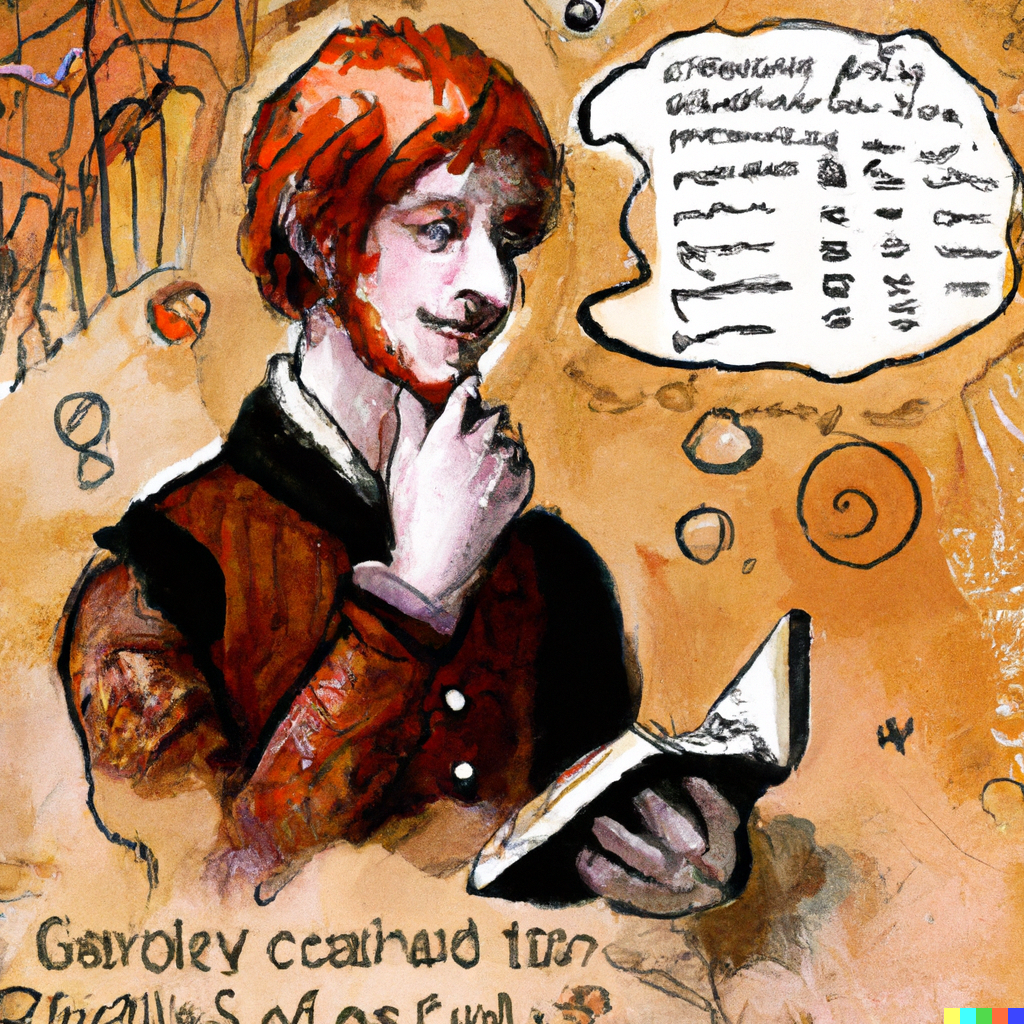

In [2]:
validator = context.sources.pandas_default.read_csv(
    filepath_or_buffer="file:///<PATH>"
)

### That's it!

Now we can use this data source for profiling, validation and documentation

In [6]:
# Create Expectations
validator.expect_column_values_to_not_be_null("pickup_datetime")
validator.expect_column_values_to_be_between(
    column="congestion_surcharge", min_value=0, max_value=1000
)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "meta": {},
  "result": {
    "element_count": 10000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 6327,
    "missing_percent": 63.27,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "success": true
}

In [7]:
# Validate data
checkpoint = SimpleCheckpoint( 
    f"NY-Taxi-Data",
    context,
    validator=validator,
)
checkpoint_result = checkpoint.run()

Calculating Metrics:   0%|          | 0/15 [00:00<?, ?it/s]

In [8]:
# View results
validation_result_identifier = checkpoint_result.list_validation_result_identifiers()[0]
context.open_data_docs(resource_identifier=validation_result_identifier)

In [ ]:
# Save the Data Context for future use
context.convert_to_file_context()